In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import loadmat

In [2]:
def load_data(path):
    data = loadmat(path)
    X = data['X']
    y = data['y']
    return X, y
X, y = load_data('datasets/ex3data1.mat')
print(np.unique(y))  #查看有几类标签
X.shape, y.shape

[ 1  2  3  4  5  6  7  8  9 10]


((5000, 400), (5000, 1))

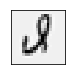

In [3]:
def plot_an_image(X):
    pick_one = np.random.randint(0, 5000)
    image = X[pick_one,:]
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(image.reshape(20, 20), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()
plot_an_image(X)

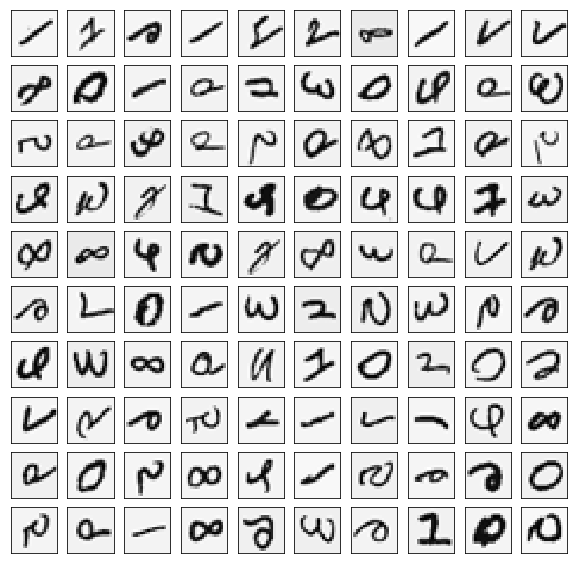

In [4]:
def plot_100_image(X):
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100) #随机选100个样本
    sample_image = X[sample_idx,:]
    fig, ax = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(10, 10))
    for row in range(10):
        for col in range(10):
            ax[row, col].matshow(sample_image[row * 10 + col].reshape(20, 20), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()
plot_100_image(X)

In [6]:
def sigmoid_function(z):
    return 1 /(1 + np.exp(-z))

In [7]:
def cost_function(theta, X, y, lam):
    theta_reg = theta[1:]
    first = (-y * np.log(sigmoid_function(X @ theta))) + (y - 1) * np.log(1 - sigmoid_function(X @ theta))
    reg = (theta @ theta) * lam / (2 * len(X))
    return np.mean(first) + reg

In [8]:
def gradient_function(theta, X, y, lam):
    theta_reg = theta[1:]
    first = (1 / len(X)) * X.T @ (sigmoid_function(X @ theta) - y)
    reg = np.concatenate([np.array([0]), (lam / len(X)) * theta_reg])
    return first + reg

In [21]:
from scipy.optimize import minimize
def one_vs_all(X, y, lam, K):
    all_theta = np.zeros((K, X.shape[1]))
    for i in range(1, K + 1):
        theta = np.zeros(X.shape[1])
        y_i = np.array([1 if label == i else 0 for label in y])
        ret = minimize(fun=cost_function, x0=theta, args=(X, y_i , lam), method='TNC', jac=gradient_function,
                      options={'disp': True})
        all_theta[i - 1,:] = ret.x
    return all_theta
def predict_all(X, all_theta):
    h = sigmoid_function(X @ all_theta.T)  
    h_argmax = np.argmax(h, axis=1)
    h_argmax = h_argmax + 1
    
    return h_argmax

In [22]:
X = np.insert(X, 0, 1, axis=1)
y = y.flatten()

In [23]:
all_theta = one_vs_all(X, y, 1, 10)
all_theta

array([[-9.37418854e-01, -4.19874604e-01, -4.19874604e-01, ...,
         1.18876809e-03,  2.72551838e-08,  0.00000000e+00],
       [-1.25077076e+00, -6.09422649e-01, -6.09422649e-01, ...,
         4.28847588e-03, -4.89626232e-04,  0.00000000e+00],
       [-1.67871930e+00, -9.83997663e-01, -9.83997663e-01, ...,
        -2.80791981e-05, -2.36865536e-07,  0.00000000e+00],
       ...,
       [-2.61026301e+00, -1.66194737e+00, -1.66194737e+00, ...,
        -1.03245932e-04,  8.22957481e-06,  0.00000000e+00],
       [-1.76522838e+00, -8.65590977e-01, -8.65590977e-01, ...,
        -1.45251280e-03,  1.09825540e-04,  0.00000000e+00],
       [-1.89184772e+00, -9.93834265e-01, -9.93834265e-01, ...,
        -1.01177499e-04,  1.09226174e-05,  0.00000000e+00]])

In [25]:
y_pred = predict_all(X, all_theta)
accuracy = np.mean(y_pred == y)
print('accuracy is {}'.format(accuracy * 100))

accuracy is 94.39999999999999
